<IPython.core.display.Javascript object>


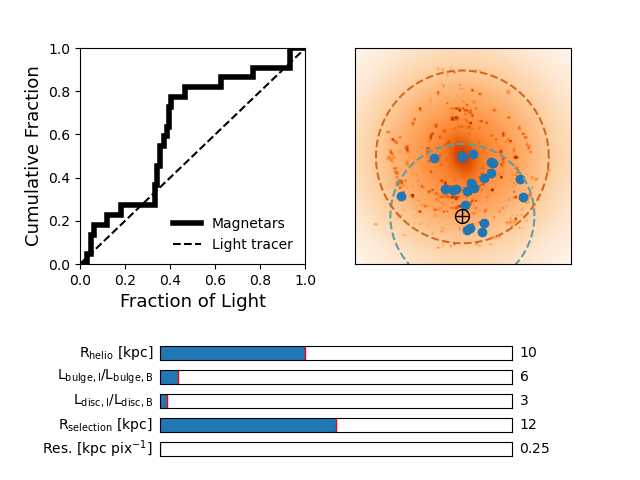

0

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 13 10:04:17 2021

@author: ashley
"""

# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage
from matplotlib import colors
from matplotlib import cm
from matplotlib.widgets import Slider
from matplotlib.widgets import Button
from matplotlib.widgets import CheckButtons



mcgill = pd.read_csv('TabO1.csv')
MWmagnetars = mcgill         
distances = MWmagnetars.Dist.values


### Arms & sprinkles, output from galactic_magnetars.py and the Reid et al. 2019 methodology.
reid_sprinkle_x = np.loadtxt('reid_and_sprinkles_x.txt')
reid_sprinkle_y = np.loadtxt('reid_and_sprinkles_y.txt')
reid_sprinkle_h = np.loadtxt('reid_and_sprinkles_h.txt')
reid_sprinkle_lbol = np.loadtxt('reid_and_sprinkles_bol.txt')

######## Comparison data
flight_compare = np.loadtxt('comparison_flight_data.txt',skiprows=2)
# 0 = FRBs - IR - Mannings et al. 2020
# 1 = FRBs - UV - Mannings et al. 2020
# 2 = Light
# 3 = LGRBs - IR/UVIS - Blanchard et al. 2016
# 4 = Blanchard et al. 2016 LGRB redshift
# 5 = Blanchard et al. 2016 LGRB band (UVIS or IR) - IR is 0, UVIS is 1
# 6 = LGRBs - IR - Lyman et al. 2017
# 7 = SGRBs - IR/UVIS - Fong & Berger 2013 (inc. Fong et al. 2010)
# 8 = Fong & Berger 2013 SGRB band (UVIS or IR) - IR is 0, UVIS is 1
# 9 = Type Ia SNe - u - Wang et al. 2013
# 10 = Type Ia SNe - g - Wang et al. 2013
# 11 = Type Ia SNe - r - Wang et al. 2013
# 12 = CCSNe - IR - Svensson et al. 2010
# 13 = SLSNe - UV - Lunnan et al. 2015
# 14 = Random B (calculated in _5.py)
# 15 = Random I (calculated in _5.py)


#-------------------------------------------------------------------------------------------------------------#
############### FRACTIONAL LIGHT #########################################################
#-------------------------------------------------------------------------------------------------------------#

ks = np.empty((7,3))

fig = plt.figure()
plt.subplots_adjust(bottom=0.45,top=0.9)
ax1 = fig.add_subplot(121)
p = ax1.plot([-1,-2],[0,1])
ax_slide = plt.axes([0.25, 0.1, 0.55, 0.03]) 
s_factor = Slider(ax_slide, 'R$_\mathrm{selection}$ [kpc]', 0.3*30, 0.5*30, valinit=0.4*30, valstep=0.01*30)

ax_slide2 = plt.axes([0.25, 0.05, 0.55, 0.03])
s_factor2 = Slider(ax_slide2, 'Res. [kpc pix$^{-1}$]', 30/120, 30/15, valinit=30/120, valstep=0.05)

ax_slide3 = plt.axes([0.25, 0.15, 0.55, 0.03])
s_factor3 = Slider(ax_slide3, 'L$_\mathrm{disc,I}$/L$_\mathrm{disc,B}$', 1, 100, valinit=3, valstep=1)

ax_slide4 = plt.axes([0.25, 0.2, 0.55, 0.03])
s_factor4 = Slider(ax_slide4, 'L$_\mathrm{bulge,I}$/L$_\mathrm{bulge,B}$', 1, 100, valinit=6, valstep=1)

ax_slide5 = plt.axes([0.25, 0.25, 0.55, 0.03])
s_factor5 = Slider(ax_slide5, 'R$_\mathrm{helio}$ [kpc]', 3, 20, valinit=10, valstep=1)


global magnetar_flight


###########original
maxdistlim = s_factor5.val #kpc
names = MWmagnetars.Name.values[(distances > 0) & (distances < maxdistlim)]
xmag = np.loadtxt('mcgill_x.txt')[(distances > 0) & (distances < maxdistlim)]
ymag = np.loadtxt('mcgill_y.txt')[(distances > 0) & (distances < maxdistlim)]   
hmag = np.loadtxt('mcgill_h.txt')[(distances > 0) & (distances < maxdistlim)]   
derrup = MWmagnetars.Dist_EUp.values[(distances > 0) & (distances < maxdistlim)]
derrlo = MWmagnetars.Dist_EDn.values[(distances > 0) & (distances < maxdistlim)]
dmag = distances[(distances > 0) & (distances < maxdistlim)]


circlecut = s_factor.val/30
Res = int(30/(s_factor2.val) - 1)
Noisegrid = np.ones((Res+1,Res+1))  


armdisc_redux = s_factor3.val
bulgebar_redux = s_factor4.val

arms = np.loadtxt('Fullmap/Arms_'+str(Res)+'.txt')/(armdisc_redux)
disc_in = np.loadtxt('Fullmap/Disc_'+str(Res)+'.txt')/(armdisc_redux)
disc = scipy.ndimage.gaussian_filter(disc_in,sigma=5)
barbulge = np.loadtxt('Fullmap/Barbulge_'+str(Res)+'.txt')/(bulgebar_redux)

Resgrid = Noisegrid + arms + disc + barbulge

R = 30/(Res+1)


######### For the image
ax2 = fig.add_subplot(122)
ax2.imshow(Resgrid,cmap=cm.Oranges,norm=colors.LogNorm()) 
ax2.invert_yaxis()
ax2.set_yticks([])
ax2.set_xticks([])

theta = np.linspace(0, 2*np.pi, 100)
rhelio = maxdistlim*((Res+1)/30)
XC = rhelio*np.cos(theta) + (0/R + Res/2)
YC = rhelio*np.sin(theta) + ((0-8.2)/R + Res/2)
ax2.plot(XC,YC,color='cadetblue',linestyle='--')

rselection = s_factor.val*((Res+1)/30)
XS = rselection*np.cos(theta) + (0/R + Res/2)
YS = rselection*np.sin(theta) + ((8.2-8.2)/R + Res/2)
ax2.plot(XS,YS,color='chocolate',linestyle='--')

ax2.set_xlim([0,Res+1])
ax2.set_ylim([0,Res+1])


############## Back to Flight
shiftedx = (xmag[1:21]/R + Res/2)
shiftedy = ((ymag[1:21]-8.2)/R + Res/2)
ax2.scatter(shiftedx,shiftedy)
ax2.plot((0/R + Res/2),((0-8.2)/R + Res/2),'ok',fillstyle='none',markersize=10)
ax2.plot((0/R + Res/2),((0-8.2)/R + Res/2),'+k',markersize=10)

# Get all pixel z values and sorting them into increasing order.
zlist = []
rlist = []
indicies = []
II = 0
mask = np.ones((Res+1,Res+1))      #Res+1/2 for half galaxy
indexes = np.linspace(0,Res,Res+1).astype(int)
for valx in indexes:
    for valy in indexes:   #add [0:np.int((Res+1)/2)] for Flight on half Galax only
        zlist = zlist + [Resgrid[valy,valx]]   #y,x is correct! Verified by blurred plotting above and mask below.
        rval = np.sqrt((valx-(Res+1)/2)**2 + (valy-(Res+1)/2)**2)
        rlist = rlist + [rval] #radial distance from centre of image
        indicies.append(II)
        if rval < circlecut*(Res+1):    # and valy > int((Res+1)/2):   #y is actually y, as confirmed by cyan plotting above. 
            mask[valy,valx] = np.nan
        II = II + 1
zlist = np.array(zlist)
rlist = np.array(rlist)
indicies = np.array(indicies)


indicies = indicies[rlist < circlecut*(Res+1)]    #a circle 24kpc wide - selecting the indicies that satisify this
zlist = zlist[rlist < circlecut*(Res+1)]   #3 sigma, rather than 5 connected 1 sigma, again, z values in this circle
zsort, indexsort = zip(*sorted(zip(zlist,indicies)))    #indicies sorted by z value

zsort = np.array(zsort)
flcumul = []
cflux = 0
for entry in zsort:
    cflux = cflux + entry
    flcumul.append(cflux)
flight_masers = np.array(flcumul)/np.max(flcumul)  #every pixel gets assigned a value from 0 to 1

# Ordering x,y PIXEL coordinates so that each z value has a coordinate pair in the same order as z and the indicies
xlist = []
ylist = []
c = 0
for Xx in indexes:
    for Yy in indexes:    #add [0:np.int((Res+1)/2)] for Flight on half Galax only
        if c in indicies:  #i.e. if this index  appears amongst those above the noise
            xlist.append(Xx)
            ylist.append(Yy)  
        c = c + 1
zsort, xsort = zip(*sorted(zip(zlist, xlist))) 
zsort, ysort = zip(*sorted(zip(zlist, ylist))) 
#x and y now ordered the same as z (increasing z) and indexsort and flight_masers.
xsort = np.array(xsort)
ysort = np.array(ysort)


mgn = 0
bestdex = []
offthehost = []
for XM in shiftedx:
       diffx = (XM - (xsort))**2
       diffy = (shiftedy[mgn] - (ysort))**2   #shiftedx/y includes extra R/2 to shift magn coordinates to CENTER of the pixel
       dist = np.sqrt(diffx+diffy)
       gradshifted = np.sqrt( (XM - (Res+1)/2)**2 + (shiftedy[mgn] - (Res+1)/2)**2 )
       if gradshifted >= circlecut*(Res+1):  #outside the host? then use Flight = 0
           offthehost.append(mgn)
       bestdex.append(np.where(dist == np.min(dist))[0][0])  #indicies of the cells which are closest to each magnetar.
       mgn = mgn + 1
magnetar_flight = flight_masers[bestdex]  
magnetar_flight[offthehost] = 0

N,bins,patches = ax1.hist(magnetar_flight,histtype='step',density=True,cumulative=True,bins=np.linspace(0,1,100),linewidth=4,color='k')
patches[0].set_xy(patches[0].get_xy()[:-1])
p, = ax1.plot([0,1],[-1,-2],'-k',linewidth=4,label='Magnetars')

ax1.set_xlabel('Fraction of Light',fontsize=12)
ax1.set_ylabel('Cumulative Fraction',fontsize=12)
p, = ax1.plot([0,1],[0,1],'--k',label='Light tracer')
ax1.legend(loc=4,frameon=False)
ax1.set(xlim=(0,1), ylim=(0,1))




def update(val):
    ax1.clear()
    ax2.clear()
    
    maxdistlim = s_factor5.val #kpc
    distances = MWmagnetars.Dist.values
    names = MWmagnetars.Name.values[(distances > 0) & (distances < maxdistlim)]
    xmag = np.loadtxt('mcgill_x.txt')[(distances > 0) & (distances < maxdistlim)]
    ymag = np.loadtxt('mcgill_y.txt')[(distances > 0) & (distances < maxdistlim)]   
    hmag = np.loadtxt('mcgill_h.txt')[(distances > 0) & (distances < maxdistlim)]   
    derrup = MWmagnetars.Dist_EUp.values[(distances > 0) & (distances < maxdistlim)]
    derrlo = MWmagnetars.Dist_EDn.values[(distances > 0) & (distances < maxdistlim)]
    dmag = distances[(distances > 0) & (distances < maxdistlim)]
    

    circlecut = s_factor.val/30
    Resin = 30/(s_factor2.val) - 1
    Reslist = np.array([14,29,59,89,119])
    Diff = np.ndarray.tolist(np.abs(Resin-Reslist))
    mindex = Diff.index(np.min(Diff))
    Res = int(Reslist[mindex])
    

    Noisegrid = np.ones((Res+1,Res+1))  

    armdisc_redux = s_factor3.val
    bulgebar_redux = s_factor4.val
    
    arms = np.loadtxt('Fullmap/Arms_'+str(Res)+'.txt')/(armdisc_redux)
    disc_in = np.loadtxt('Fullmap/Disc_'+str(Res)+'.txt')/(armdisc_redux)
    disc = scipy.ndimage.gaussian_filter(disc_in,sigma=5)
    barbulge = np.loadtxt('Fullmap/Barbulge_'+str(Res)+'.txt')/(bulgebar_redux)
    
    Resgrid = Noisegrid + arms + disc + barbulge
    
    R = 30/(Res+1)

    ######### For the image
    ax2.imshow(Resgrid,cmap=cm.Oranges,norm=colors.LogNorm()) 
    ax2.invert_yaxis()
    ax2.set_yticks([])
    ax2.set_xticks([])

    rhelio = maxdistlim*((Res+1)/30)
    XC = rhelio*np.cos(theta) + (0/R + Res/2)
    YC = rhelio*np.sin(theta) + ((0-8.2)/R + Res/2)
    ax2.plot(XC,YC,color='cadetblue',linestyle='--')
    
    rselection = s_factor.val*((Res+1)/30)
    XS = rselection*np.cos(theta) + (0/R + Res/2)
    YS = rselection*np.sin(theta) + ((8.2-8.2)/R + Res/2)
    ax2.plot(XS,YS,color='chocolate',linestyle='--')
    
    ax2.set_xlim([0,Res+1])
    ax2.set_ylim([0,Res+1])
    
    ############## Back to Flight
    
    shiftedx = (xmag/R + Res/2)
    shiftedy = ((ymag-8.2)/R + Res/2)
    ax2.scatter(shiftedx,shiftedy)
    ax2.plot((0/R + Res/2),((0-8.2)/R + Res/2),'ok',fillstyle='none',markersize=10)
    ax2.plot((0/R + Res/2),((0-8.2)/R + Res/2),'+k',markersize=10)
    
    # Get all pixel z values and sorting them into increasing order.
    zlist = []
    rlist = []
    indicies = []
    II = 0
    mask = np.ones((Res+1,Res+1))      #Res+1/2 for half galaxy
    indexes = np.linspace(0,Res,Res+1).astype(int)
    for valx in indexes:
        for valy in indexes:   #add [0:np.int((Res+1)/2)] for Flight on half Galax only
            zlist = zlist + [Resgrid[valy,valx]]   #y,x is correct! Verified by blurred plotting above and mask below.
            #plt.plot(valx,valy,'.c')    #
            rval = np.sqrt((valx-(Res+1)/2)**2 + (valy-(Res+1)/2)**2)
            rlist = rlist + [rval] #radial distance from centre of image
            indicies.append(II)
            if rval < circlecut*(Res+1):    # and valy > int((Res+1)/2):   #y is actually y, as confirmed by cyan plotting above. 
                mask[valy,valx] = np.nan
            II = II + 1
    zlist = np.array(zlist)
    rlist = np.array(rlist)
    indicies = np.array(indicies)
    
    indicies = indicies[rlist < circlecut*(Res+1)]    #a circle 24kpc wide - selecting the indicies that satisify this
    zlist = zlist[rlist < circlecut*(Res+1)]   #3 sigma, rather than 5 connected 1 sigma, again, z values in this circle
    zsort, indexsort = zip(*sorted(zip(zlist,indicies)))    #indicies sorted by z value
    
    zsort = np.array(zsort)
    flcumul = []
    cflux = 0
    for entry in zsort:
        cflux = cflux + entry
        flcumul.append(cflux)
    flight_masers = np.array(flcumul)/np.max(flcumul)  #every pixel gets assigned a value from 0 to 1
    
    # Ordering x,y PIXEL coordinates so that each z value has a coordinate pair in the same order as z and the indicies
    xlist = []
    ylist = []
    c = 0
    for Xx in indexes:
        for Yy in indexes:    #add [0:np.int((Res+1)/2)] for Flight on half Galax only
            if c in indicies:  #i.e. if this index  appears amongst those above the noise
                xlist.append(Xx)
                ylist.append(Yy)  
            c = c + 1
    zsort, xsort = zip(*sorted(zip(zlist, xlist))) 
    zsort, ysort = zip(*sorted(zip(zlist, ylist))) 

    xsort = np.array(xsort)
    ysort = np.array(ysort)
    
    mgn = 0
    bestdex = []
    offthehost = []
    for XM in shiftedx:
           diffx = (XM - (xsort))**2
           diffy = (shiftedy[mgn] - (ysort))**2   #shiftedx/y includes extra R/2 to shift magn coordinates to CENTER of the pixel
           dist = np.sqrt(diffx+diffy)
           gradshifted = np.sqrt( (XM - (Res+1)/2)**2 + (shiftedy[mgn] - (Res+1)/2)**2 )
           if gradshifted >= circlecut*(Res+1):  #outside the host? then use Flight = 0
               offthehost.append(mgn)
           bestdex.append(np.where(dist == np.min(dist))[0][0])  #indicies of the cells which are closest to each magnetar.
           mgn = mgn + 1
    magnetar_flight = flight_masers[bestdex]  
    magnetar_flight[offthehost] = 0
    
    
    N,bins,patches = ax1.hist(magnetar_flight,histtype='step',density=True,cumulative=True,bins=np.linspace(0,1,100),linewidth=4,color='k')
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax1.plot([0,1],[-1,-2],'-k',linewidth=4,label='Magnetars')
    
    ax1.set_xlabel('Fraction of Light',fontsize=13)
    ax1.set_ylabel('Cumulative Fraction',fontsize=13)
    ax1.plot([0,1],[0,1],'--k',label='Light tracer')
    ax1.legend(loc=4,frameon=False)
    ax1.set(xlim=(0,1), ylim=(0,1))
    
    print(magnetar_flight)
    


s_factor.on_changed(update)
s_factor2.on_changed(update)
s_factor3.on_changed(update)
s_factor4.on_changed(update)
s_factor5.on_changed(update)
